# Example Notebook for BHPTNRSur1dq1e4

This notebook shows how to use the BHPTNRSur1dq1e4 model. This model was trained on point-particle black hole perturbation theory (BHPT) waveforms and calibrated to NR in the comparable mass ratio regime. 

For more information please see [here](https://bhptoolkit.org/BHPTNRSurrogate/).


### Setup
 
1. You should now have the programs git and Jupyter as well as the Python packages scipy and h5py
2. clone the BHPTSurrogate repo

```shell
>>> git clone https://github.com/BlackHolePerturbationToolkit/BHPTNRSurrogate.git
```

3. Download the h5 file using the following public link and move it to ```BHPTNRSurrogate/data/```

```
https://zenodo.org/record/7125742/BHPTNRSur1dq1e4.h5
```

Alternatively, the code will automatically do it for you.

In [2]:
# provide the path to the BHPTNRSurrogate directory
PATH_TO_BHPTNRSur = "/data/tislam/git/BHPTNRSurrogate"
#PATH_TO_BHPTNRSur = "/home/balzani57/Repo/GitRepos/Codes/tousif-bhptk/BHPTNRSurrogate/"
import numpy as np
import matplotlib.pyplot as plt
import sys
# add the path to the script directory
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")
import BHPTNRSur1dq1e4 as bhptsur

/opt/jupyter-hub/anaconda3/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/opt/jupyter-hub/anaconda3/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [3]:
# print out the documentation
help(bhptsur.generate_surrogate)

Help on function generate_surrogate in module BHPTNRSur1dq1e4:

generate_surrogate(q, modes=None, M_tot=None, dist_mpc=None, orb_phase=None, inclination=None, neg_modes=True, mode_sum=False, lmax=5, calibrated=True)
    Description : Top-level function to generate surrogate waveform in either geometric or physical units
    
    Input
    =====
    q:      mass ratio
    
    modes:  list of modes
            Default (None) corresponds to all available modes in the model
    
            [(2,2),(2,1),(3,1),(3,2),(3,3),(4,2),(4,3),(4,4),
             (5,3),(5,4),(5,5),(6,4),(6,5),(6,6),(7,5),(7,6),
             (7,7),(8,6),(8,7),(8,8),(9,7),(9,8),(9,9),(10,8),(10,9)]
            
    M_tot:     total mass of the binary in solar masses
               Default: None (in which case a geometric waveform is returned)
    
    dist_mpc:  distance of the binary from the observer in Mpc
               Default: None (in which case geometric wf is returned)
               
    orb_phase: orbital p

### 1. Generate uncalibrated waveforms (only 0PA effect) in geometric units

dict_keys([(2, 2), (2, -2), (2, 1), (2, -1), (3, 1), (3, -1), (3, 2), (3, -2), (3, 3), (3, -3), (4, 2), (4, -2), (4, 3), (4, -3), (4, 4), (4, -4), (5, 3), (5, -3), (5, 4), (5, -4), (5, 5), (5, -5)])


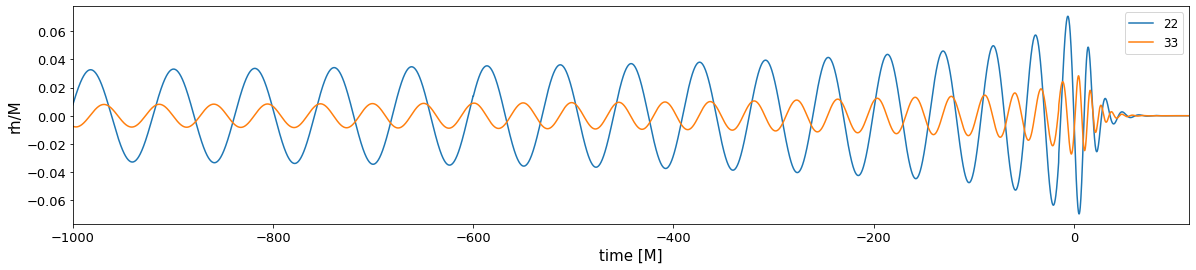

In [4]:
tsur, hsur = bhptsur.generate_surrogate(q=20, calibrated=False)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 2. Generate NR-calibrated waveforms in geometric units

dict_keys([(2, 2), (2, -2), (2, 1), (2, -1), (3, 1), (3, -1), (3, 2), (3, -2), (3, 3), (3, -3), (4, 2), (4, -2), (4, 3), (4, -3), (4, 4), (4, -4), (5, 3), (5, -3), (5, 4), (5, -4), (5, 5), (5, -5)])


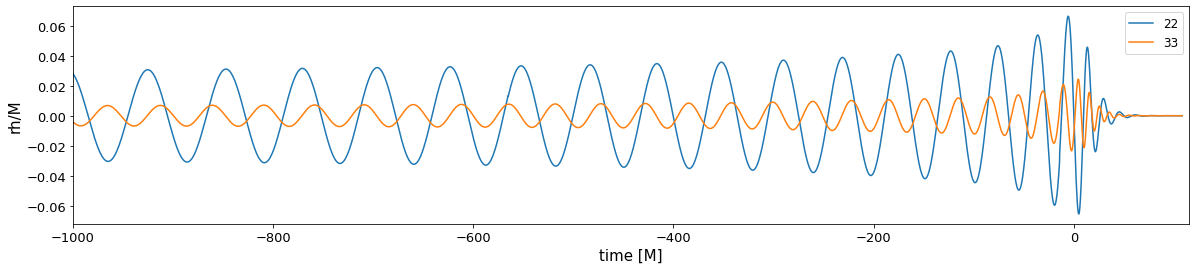

In [5]:
tsur, hsur = bhptsur.generate_surrogate(q=20)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 3. Generate (NR calibrated) waveform modes in Physical (SI) units

dict_keys([(2, 2), (2, -2), (2, 1), (2, -1), (3, 1), (3, -1), (3, 2), (3, -2), (3, 3), (3, -3), (4, 2), (4, -2), (4, 3), (4, -3), (4, 4), (4, -4), (5, 3), (5, -3), (5, 4), (5, -4), (5, 5), (5, -5)])


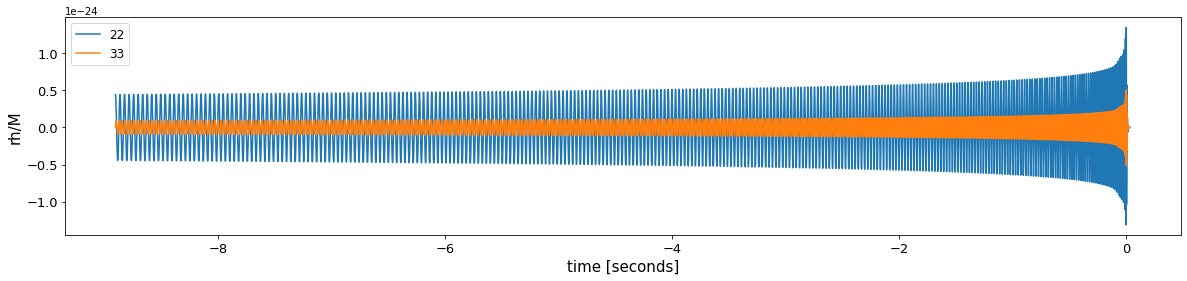

In [6]:
tsur, hsur = bhptsur.generate_surrogate(q=100, M_tot=60, dist_mpc=100)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [seconds]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 4. Generate (NR calibrated) waveform modes in Physical (SI) units evaluated at point on the sphere

dict_keys([(2, 2), (2, -2), (2, 1), (2, -1), (3, 1), (3, -1), (3, 2), (3, -2), (3, 3), (3, -3), (4, 2), (4, -2), (4, 3), (4, -3), (4, 4), (4, -4), (5, 3), (5, -3), (5, 4), (5, -4), (5, 5), (5, -5)])


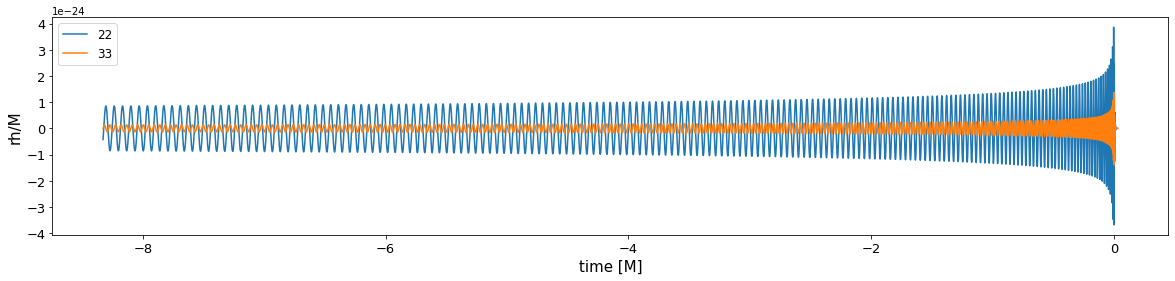

In [7]:
tsur, hsur = bhptsur.generate_surrogate(q=15, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

#### 4.1. Check for phase=0, inclination=0, 33 mode is zero

dict_keys([(2, 2), (2, -2), (2, 1), (2, -1), (3, 1), (3, -1), (3, 2), (3, -2), (3, 3), (3, -3), (4, 2), (4, -2), (4, 3), (4, -3), (4, 4), (4, -4), (5, 3), (5, -3), (5, 4), (5, -4), (5, 5), (5, -5)])


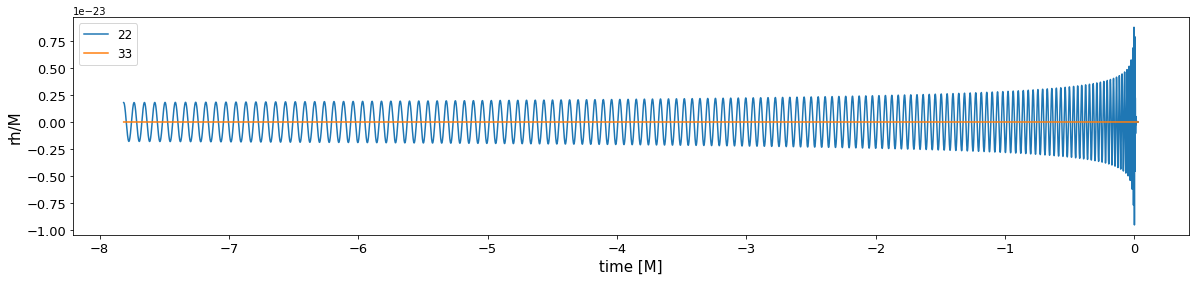

In [8]:
tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=0.0, inclination=0.0)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 5. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for a given set of modes

dict_keys([(2, 2), (2, -2), (2, 1), (2, -1), (3, 1), (3, -1), (3, 2), (3, -2), (3, 3), (3, -3), (4, 2), (4, -2), (4, 3), (4, -3), (4, 4), (4, -4), (5, 3), (5, -3), (5, 4), (5, -4), (5, 5), (5, -5)])


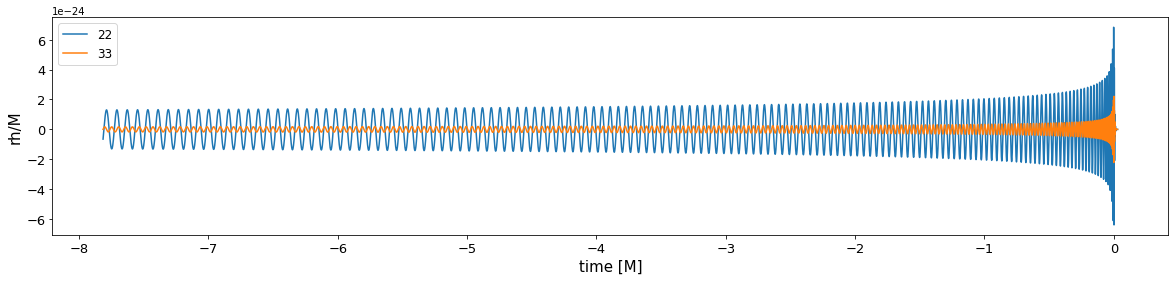

In [9]:
# Note : (2,2) mode should always be in the mode_list; otherwise it will throw errors
modes = [(2,2),(3,3),(4,4),(5,5)]

tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 6. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

dict_keys([(2, 2), (2, -2), (2, 1), (2, -1), (3, 1), (3, -1), (3, 2), (3, -2), (3, 3), (3, -3)])


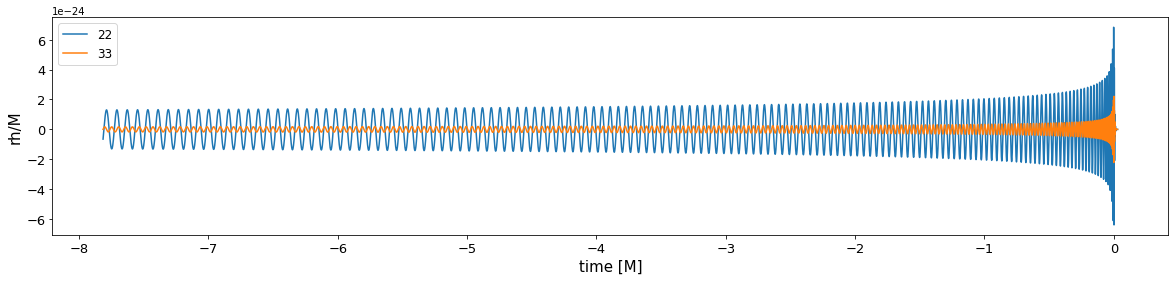

In [10]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 7. Generate mode-summed (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=5

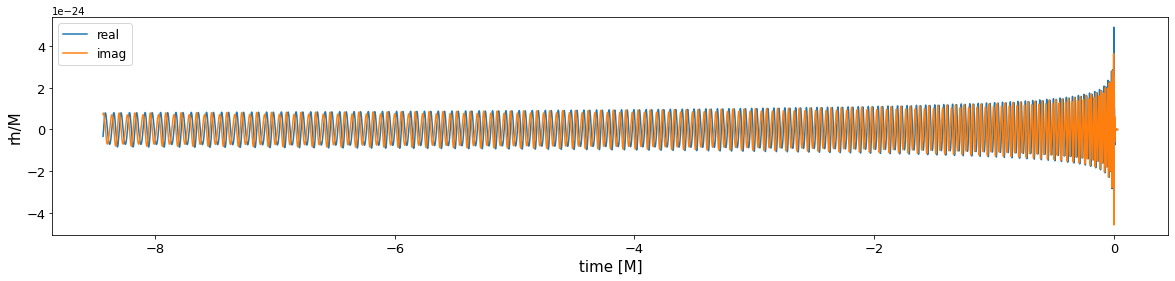

In [11]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=18, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3, mode_sum=True)


plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur), '-', label='real')
plt.plot(tsur, np.imag(hsur), '-', label='imag')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()